# K-Means Clustering

## Importing the libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [31]:
dataset = pd.read_csv('Mall_Customers (1).csv')
X = dataset.iloc[:,[3,4]].values

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, [0,1]])
X[:, [0,1]] = imputer.transform(X[:,[0,1]])

## Using the elbow method to find the optimal number of clusters

<function matplotlib.pyplot.show(close=None, block=None)>

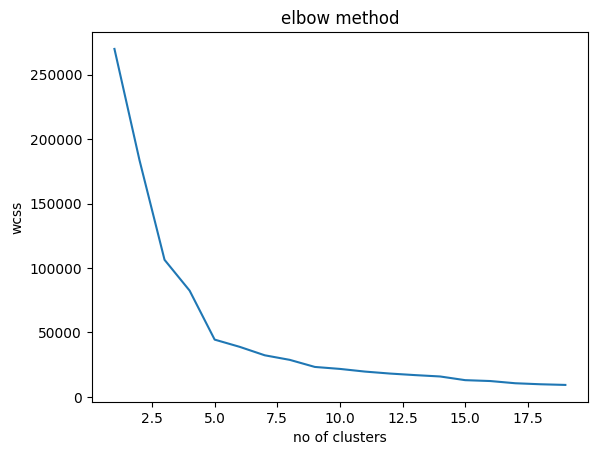

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1 ,20), wcss)
plt.title('elbow method')
plt.xlabel('no of clusters')
plt.ylabel("wcss")
plt.show



## Training the K-Means model on the dataset

In [35]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 43)
y_pred = kmeans.fit_predict(X)

In [36]:
print(y_pred)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


## Visualising the clusters

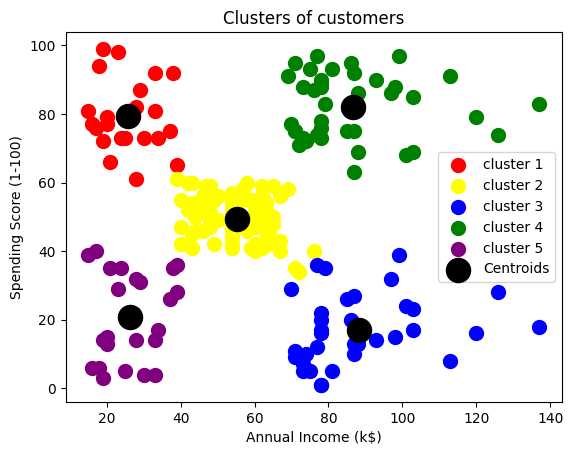

In [38]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c ='red', s = 100, label = 'cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c ='yellow', s = 100, label = 'cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], c ='blue', s = 100, label = 'cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], c ='green', s = 100, label = 'cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], c ='purple', s = 100, label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()